## SMS Spam Filter Using Machine Learning

In [1]:
import pandas as pd
import nltk

In [238]:
pd.set_option('display.max_colwidth',100)
df = pd.read_csv(r"C:\Users\yaram\Downloads\NLP\Ch01\01_03\Start\SMSSpamCollection.tsv",sep = "\t",header = None)

In [3]:
df.columns = ["Label",'Body_text']
df.head()

,Label,Body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [4]:
print("shape of data",df.shape)
print("Number of spam and ham are:\n", df.Label.value_counts())

shape of data (5568, 2)
Number of spam and ham are:
 ham     4822
spam     746
Name: Label, dtype: int64


In [5]:
#missing values
print("Number of missing values in label data {}".format(df["Label"].isnull().sum()))
print("Number of missing values in Body_text data {}".format(df["Label"].isnull().sum()))

Number of missing values in label data 0
Number of missing values in Body_text data 0


## Cleaning Body_Text

In [6]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
#removing punctuations.
def remove_punc(text):
    text_punc = "".join([word for word in text if word not in string.punctuation])
    return text_punc

In [8]:
df["Body_clean_text"] = df["Body_text"].apply(lambda x: remove_punc(x) )

In [9]:
df.head()

,Label,Body_text,Body_clean_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


In [11]:
#Tokenization
import re
def tokenize(text):
    tokens = re.split('\W+',text)
    return tokens
df['Body_text_tokenize'] = df["Body_clean_text"].apply(lambda x: tokenize(x.lower()))

In [12]:
df.head()

,Label,Body_text,Body_clean_text,Body_text_tokenize
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


In [13]:
#Remove Stopwords
import nltk
stopwords = nltk.corpus.stopwords.words("english")
stopwords[1:10]

['me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [14]:
def remove_stopwords(text):
    no_stop = [word for word in text if word not in stopwords]
    return no_stop
df["Body_text_no_stopword"] = df["Body_text_tokenize"].apply(lambda x: remove_stopwords(x))

In [72]:
# final Clean text without stop words will be below.
df.head()

,Label,Body_text,Body_clean_text,Body_text_tokenize,Body_text_no_stopword,Body_with_Stemmed_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"


In [73]:
#Stemming text ( ex: (runner,run,running) = run)
# Here we are using porter stemmer for stemming for text and there are are stemming methods also.
ps = nltk.PorterStemmer()
def stemming_text(text):
    stem_text = [ps.stem(word).lower() for word in text]
    return stem_text
df["Body_with_Stemmed_text"] = df["Body_text_no_stopword"].apply(lambda x: stemming_text(x))

In [84]:
#feature engineering
df['body_length'] = df["Body_text"].apply(lambda x: len(x)-x.count(" "))

In [85]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100

df["body_text_punctuation"] = df["Body_text"].apply(lambda x : count_punct(x))

In [86]:
df.head()

,Label,Body_text,Body_clean_text,Body_text_tokenize,Body_text_no_stopword,Body_with_Stemmed_text,body_length,body_text_punctuation
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won...",160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...",128,4.7
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]",49,4.1
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]",62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]",28,7.1


In [95]:
#Evaluation the features
from matplotlib import pyplot
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

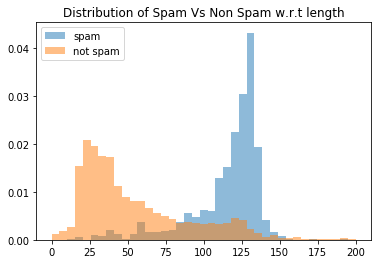

In [115]:
bins = np.linspace(0,200,40)
pyplot.hist(df[df['Label']=='spam']['body_length'],bins, alpha = 0.5,normed = True,label= 'spam')
pyplot.hist(df[df['Label']=='ham']['body_length'],bins, alpha = 0.5,normed = True,label= 'not spam')
pyplot.legend(loc = 'upper left')
pyplot.title("Distribution of Spam Vs Non Spam w.r.t length")
pyplot.show()

In [116]:
# From above chart we can observe clearly that length of spam text is larger than length of non spam text
# Therefore it isimportant to consider this feature for building better machine learning model.

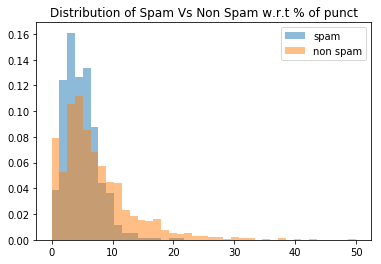

In [117]:
bins = np.linspace(0,50,40)
pyplot.hist(df[df["Label"]=='spam']["body_text_punctuation"],bins,alpha = 0.5,normed=True,label = 'spam')
pyplot.hist(df[df["Label"]=='ham']["body_text_punctuation"],bins,alpha = 0.5,normed=True,label = 'non spam')
pyplot.legend(loc = 'upper right')
pyplot.title("Distribution of Spam Vs Non Spam w.r.t % of punct")
pyplot.show()

In [110]:
# From above chart we can observe clearly that spam text are having more punctuations than non spam text
# Therefore it isimportant to consider this feature for building better machine learning model.

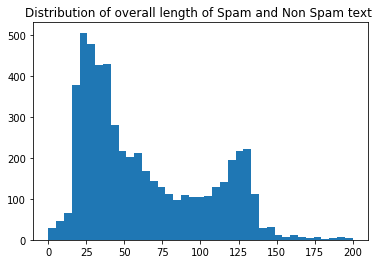

In [119]:
# Lets see the overall distribution of above two feature when there is any requirement of transformation
# for length of text
bins = np.linspace(0,200,40)
pyplot.hist(df["body_length"],bins)
pyplot.title("Distribution of overall length of Spam and Non Spam text ")
pyplot.show()

In [123]:
# from above graph clear shows that values in body length variable are not skewed so there is no need of transformation

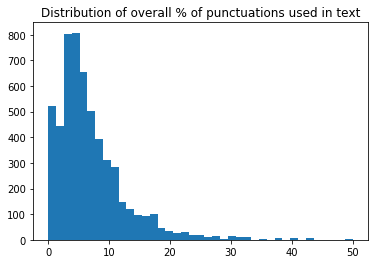

In [124]:
# Lets see the overall distribution of above two feature when there is any requirement of transformation
# for length of text
bins = np.linspace(0,50,40)
pyplot.hist(df["body_text_punctuation"],bins)
pyplot.title("Distribution of overall % of punctuations used in text")
pyplot.show()

In [125]:
# from above graph clear shows  that values in body_text_punctuation variable are 
# skewed so there is need of transformation

In [126]:
# Transformation of "body_text_punctuation" using Box-cox Transformation method

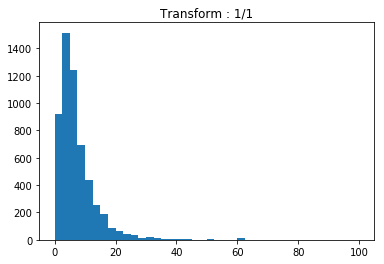

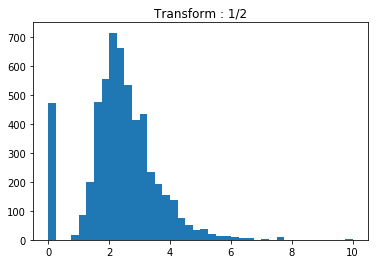

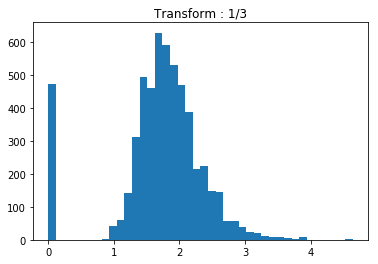

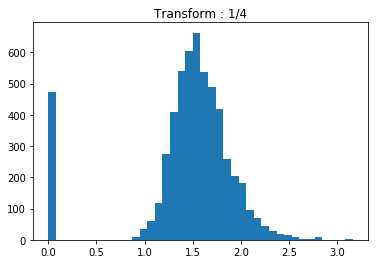

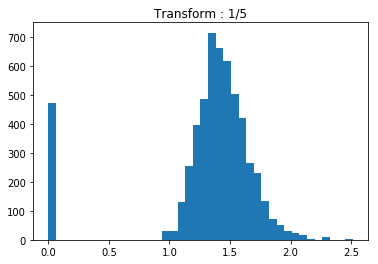

In [129]:
# Lets see how the values will be normalized in 3 stages
for i in [1,2,3,4,5]:
    pyplot.hist((df["body_text_punctuation"])**(1/i),bins =40)
    pyplot.title("Transform : 1/{}".format(str(i)))
    pyplot.show()

In [133]:
#lets perform vectorization on the body with stemmed text
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(analyzer = stemming_text)
x_Tfidf = vect.fit_transform(df['Body_text_no_stopword'])

In [156]:
X_features = pd.concat([df['body_length'],df['body_text_punctuation'],pd.DataFrame(x_Tfidf.toarray())],axis = 1)

## Random Forest classifier and Tuning Hyperparmeter

In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [192]:
X_train,X_test,y_train,y_test = train_test_split(X_features,df['Label'],test_size = 0.3)

In [218]:
def train_RF(n_est,depth):
    RF = RandomForestClassifier(n_estimators = n_est,max_depth = depth, n_jobs = -1)
    RF_model = RF.fit(X_train,y_train)
    y_pred = RF_model.predict(X_test)
    precision,recall, fscore,support = score(y_test,y_pred,pos_label = 'spam',average = 'binary')
    print('For estimator {}  and Depth {} the results is precision: {} \ recall: {} Accuracy:{} '.format(n_est,depth,round(precision,3),round(recall,3),round((y_pred==y_test).sum()/len(y_pred),3)))

In [220]:
for n_est in [10,50,100]:
    for depth in [10,20,30,None]:
        train_RF(n_est,depth)

For estimator 10  and Depth 10 the results is precision: 1.0 \ recall: 0.366 Accuracy:0.919 
For estimator 10  and Depth 20 the results is precision: 0.992 \ recall: 0.559 Accuracy:0.943 
For estimator 10  and Depth 30 the results is precision: 0.993 \ recall: 0.671 Accuracy:0.958 
For estimator 10  and Depth None the results is precision: 0.988 \ recall: 0.756 Accuracy:0.968 
For estimator 50  and Depth 10 the results is precision: 1.0 \ recall: 0.277 Accuracy:0.908 
For estimator 50  and Depth 20 the results is precision: 1.0 \ recall: 0.61 Accuracy:0.95 
For estimator 50  and Depth 30 the results is precision: 1.0 \ recall: 0.681 Accuracy:0.959 
For estimator 50  and Depth None the results is precision: 1.0 \ recall: 0.812 Accuracy:0.976 
For estimator 100  and Depth 10 the results is precision: 1.0 \ recall: 0.221 Accuracy:0.901 
For estimator 100  and Depth 20 the results is precision: 1.0 \ recall: 0.568 Accuracy:0.945 
For estimator 100  and Depth 30 the results is precision: 1.

In [194]:
# we know one of most important feature of Random forest is Feature importance
sorted(zip(RF_model.feature_importances_,X_train.columns),reverse = True)[0:5]

[(0.05615664571118213, 'body_length'),
 (0.040402494559930634, 2032),
 (0.03714815967027712, 1804),
 (0.03296865371588265, 3135),
 (0.0241510880535006, 4799)]

In [232]:
RF = RandomForestClassifier(n_estimators = 100,max_depth = 30, n_jobs = -1)
RF_model = RF.fit(X_train,y_train)
y_pred = RF_model.predict(X_test)
precision, recall, fscore, support = score(y_test,y_pred,pos_label = 'spam',average = 'binary' )

In [233]:
print('precision:{} / recall: {} / Accuracy: {}'.format(round(precision,3),round(recall,3),round((y_pred==y_test).sum()/len(y_pred)),3))

precision:1.0 / recall: 0.704 / Accuracy: 1.0


In [234]:
precision, recall, fscore, support = score(y_test,y_pred,pos_label = 'ham',average = 'binary' )

In [235]:
print('precision:{} / recall: {} / Accuracy: {}'.format(round(precision,3),round(recall,3),round((y_pred==y_test).sum()/len(y_pred)),3))

precision:0.959 / recall: 1.0 / Accuracy: 1.0
